In [3]:
import pandas as pd

In [4]:
file = r'C:\Users\kdp\OneDrive\바탕 화면\09.머신러닝\mini\wine\winequality-red.csv'
white_wine = pd.read_csv(file)

맛별 분류 

In [5]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [6]:
white_wine['taste'] = [1. if grade > 6 else 0. for grade in white_wine['quality']]

In [7]:
for i in white_wine.columns:
    print(f'{i}: {white_wine[i].unique()}')

fixed acidity: [ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8 10.9
 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8  9.1
 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3  9.2 13.   6.5
 12.9 14.3 15.5 11.7 13.2 12.1  5.1  4.9  5.9  6.   5.5]
volatile acidity: [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44  0.635 0.82  0.48  1.    0.21  0.35  0.

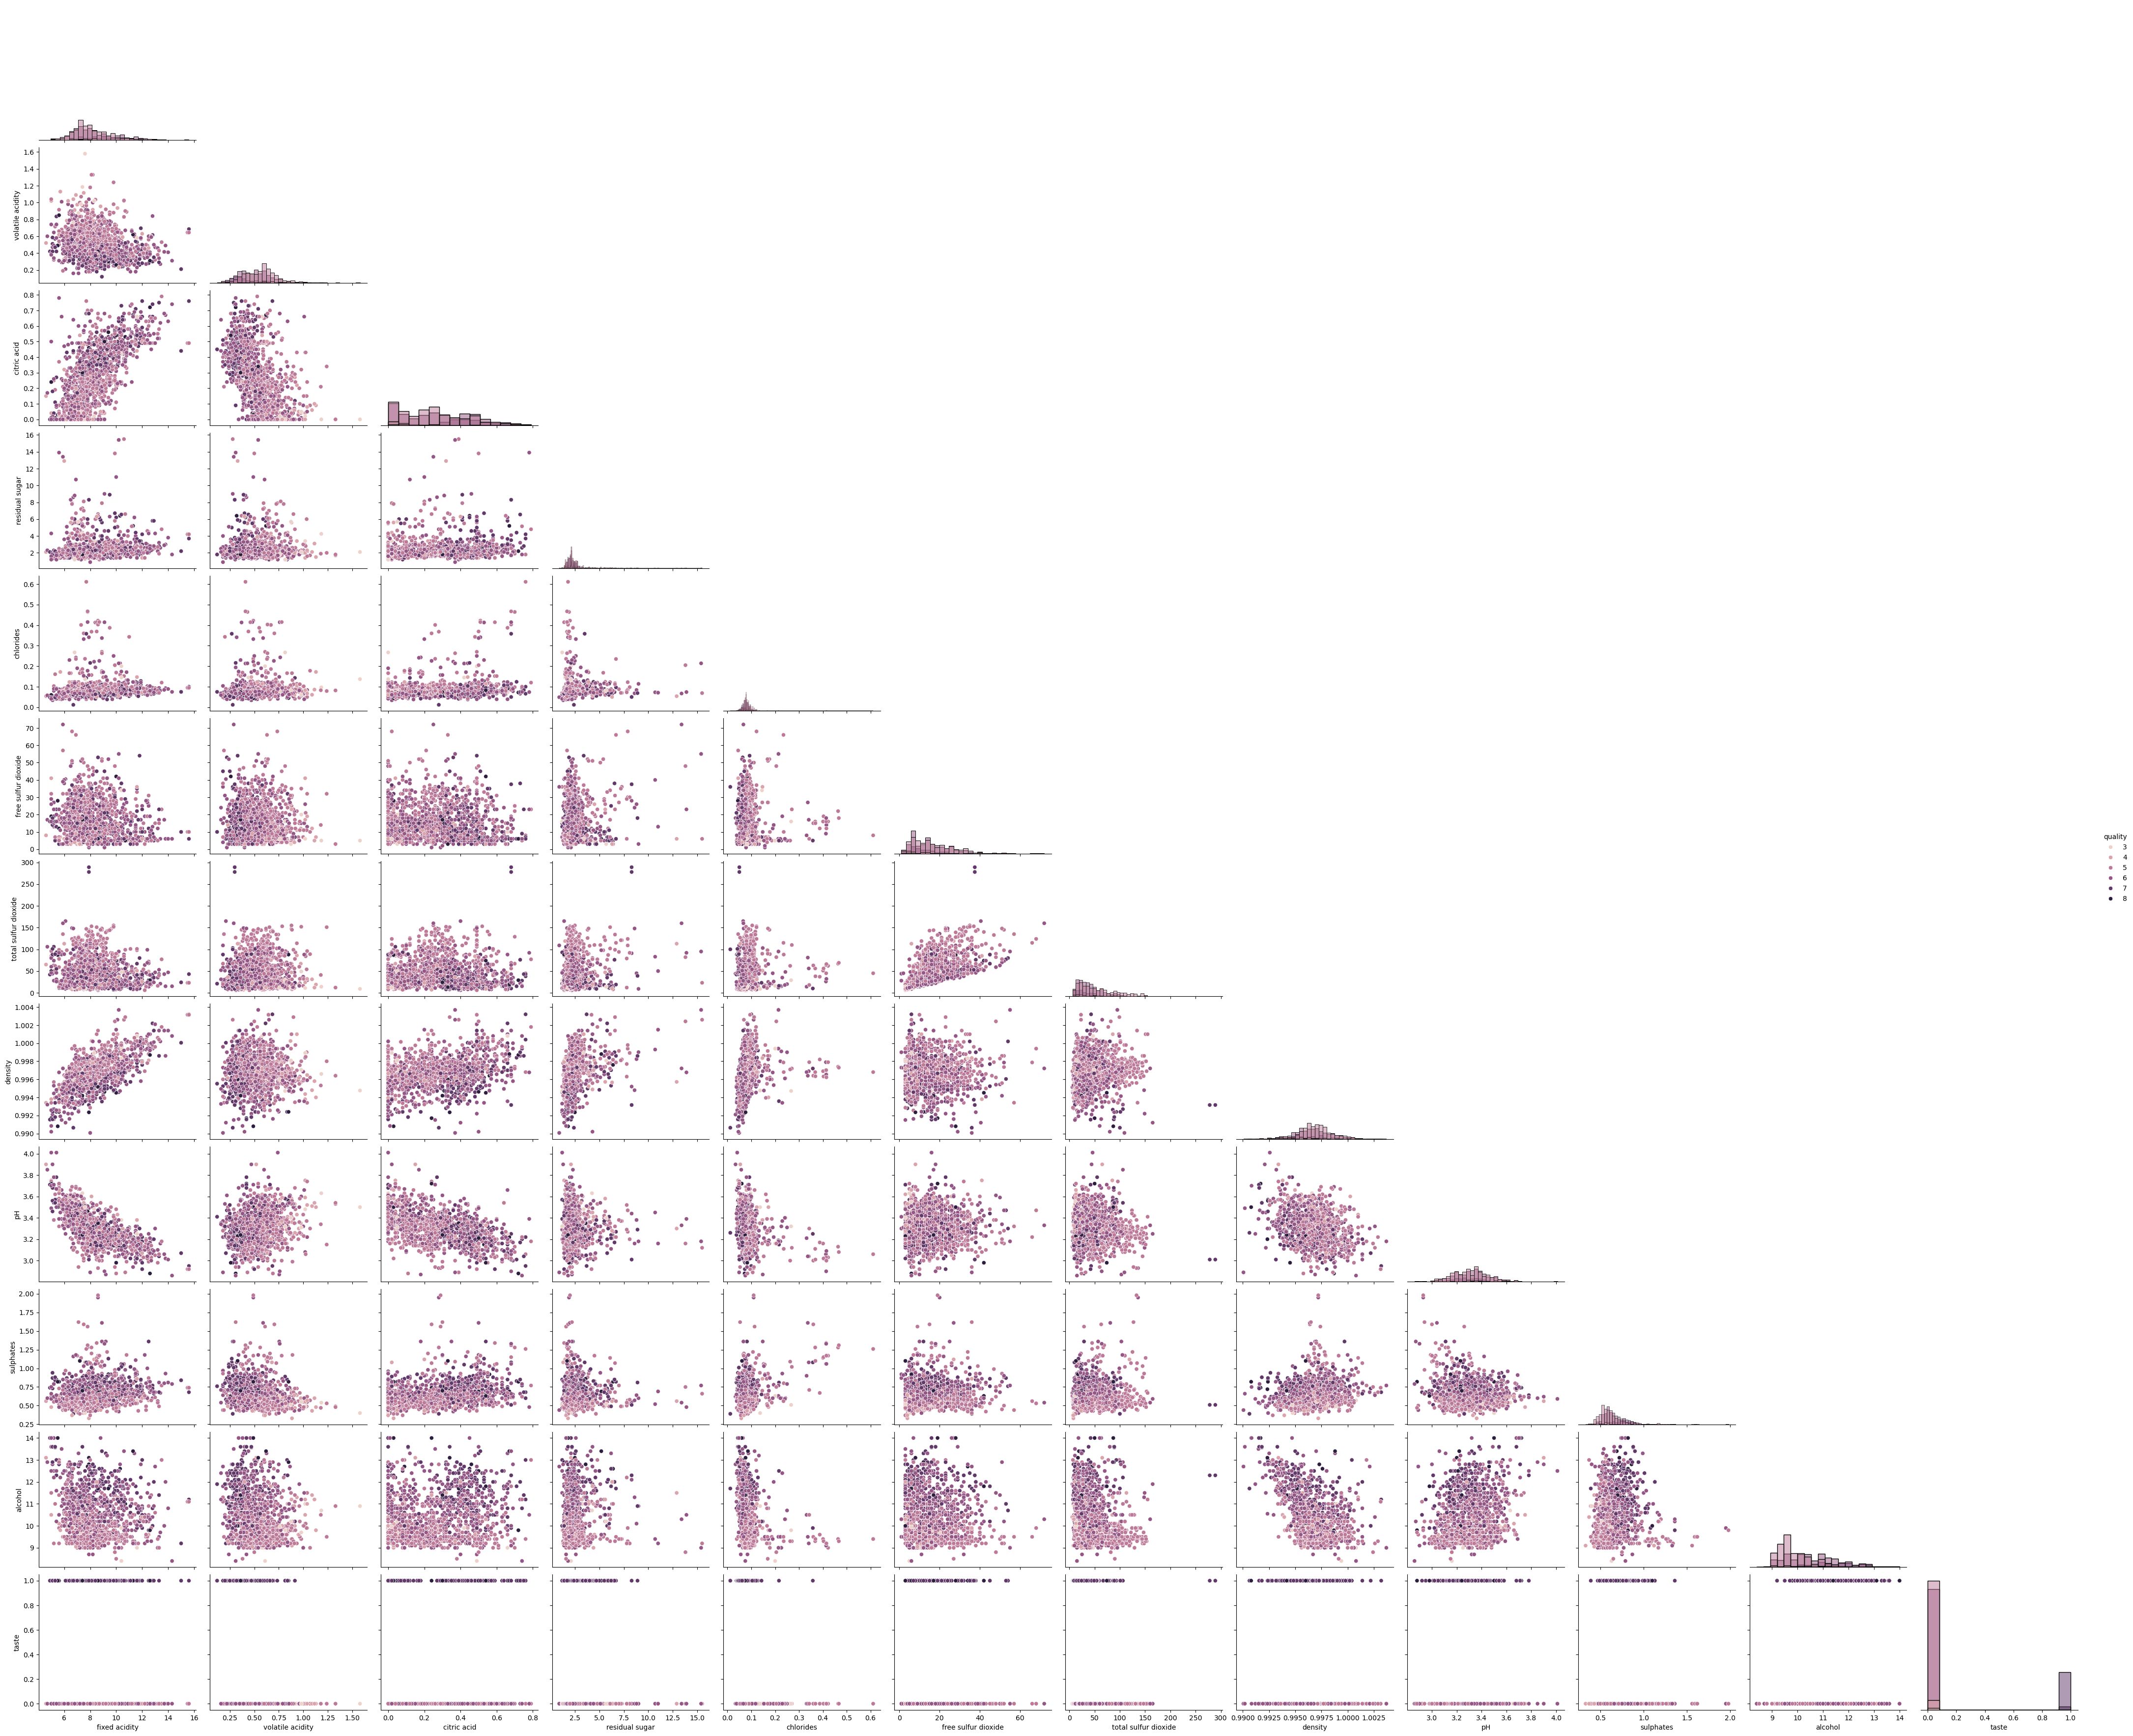

In [8]:
import seaborn as sns
sns.pairplot(white_wine, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True)

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀
from sklearn.svm import SVC  # 서포트 벡터 머신
from sklearn.neighbors import KNeighborsClassifier  # K-최근접 이웃
from sklearn.naive_bayes import GaussianNB  # 나이브 베이즈
from sklearn.tree import DecisionTreeClassifier  # 결정 트리
from sklearn.ensemble import RandomForestClassifier  # 랜덤 포레스트

from sklearn.metrics import accuracy_score


X = white_wine.drop(['taste','quality'], axis=1)
y = white_wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱
wine_LR = LogisticRegression()
wine_LR.fit(X_train, y_train)
pre_y_LR = wine_LR.predict(X_test)

# SVC
wine_svc = SVC()
wine_svc.fit(X_train, y_train)
pre_y_svc = wine_svc.predict(X_test)

# KNN
wine_KNN = KNeighborsClassifier(5)
wine_KNN.fit(X_train, y_train)
pre_y_KNN = wine_KNN.predict(X_test)

# NB
wine_NB = GaussianNB()
wine_NB.fit(X_train, y_train)
pre_y_NB = wine_NB.predict(X_test)

# Decision Tree
wine_DT = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_DT.fit(X_train, y_train)
pre_y_tree = wine_DT.predict(X_test)

# Random Forest
wine_rfc = RandomForestClassifier(n_estimators=200)
wine_rfc.fit(X_train, y_train)
pre_y_rfc = wine_rfc.predict(X_test)

# 모델 결정값들 비교
acc_df = pd.DataFrame({'classifier':['LR', 'SVC', 'KNN', 'NB', 'DT', 'RF'],
                       'accuary': [accuracy_score(y_test, pre_y_LR),
                                   accuracy_score(y_test, pre_y_svc),
                                   accuracy_score(y_test, pre_y_KNN),
                                   accuracy_score(y_test, pre_y_NB),
                                   accuracy_score(y_test, pre_y_tree),
                                   accuracy_score(y_test, pre_y_rfc)]})


c:\Users\kdp\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
acc_df

classifier   accuary
0         LR  0.890625
1        SVC  0.865625
2        KNN  0.865625
3         NB  0.831250
4         DT  0.887500
5         RF  0.903125

In [8]:
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2', None]
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# print(grid_search.best_params_)

# '''
# {'max_depth': None, 
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 300}
# '''

Accuracy: 0.9062500
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       277
         1.0       0.78      0.42      0.55        43

    accuracy                           0.91       320
   macro avg       0.85      0.70      0.75       320
weighted avg       0.90      0.91      0.89       320



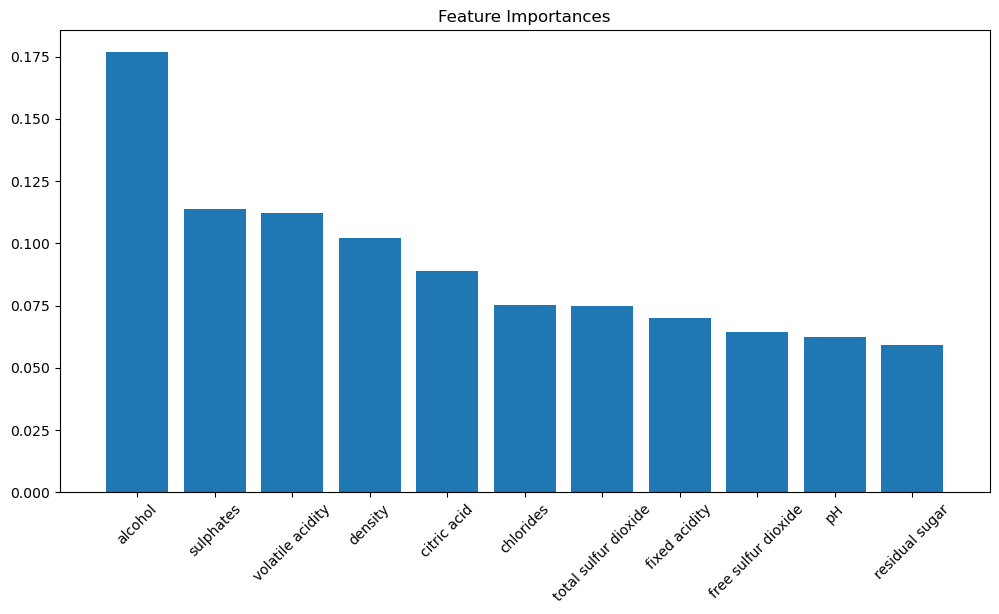

'\nAccuracy: 0.89\n              precision    recall  f1-score   support\n\n         0.0       0.90      0.97      0.93       753\n         1.0       0.86      0.66      0.74       227\n\n    accuracy                           0.89       980\n   macro avg       0.88      0.81      0.84       980\nweighted avg       0.89      0.89      0.89       980\n\n==> 오버 샘플링링\n\n'

In [12]:
# 최적의 파라미터로 재학습

best_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

best_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

'''
Accuracy: 0.89
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       753
         1.0       0.86      0.66      0.74       227

    accuracy                           0.89       980
   macro avg       0.88      0.81      0.84       980
weighted avg       0.89      0.89      0.89       980

==> 오버 샘플링링

'''

In [51]:
from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))

'''
Accuracy: 0.8826531
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       753
         1.0       0.79      0.67      0.72       227

    accuracy                           0.88       980
   macro avg       0.85      0.81      0.82       980
weighted avg       0.88      0.88      0.88       980
'''

Accuracy: 0.8826531
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       753
         1.0       0.79      0.67      0.72       227

    accuracy                           0.88       980
   macro avg       0.85      0.81      0.82       980
weighted avg       0.88      0.88      0.88       980



c:\Users\kdp\anaconda3\envs\ML_PY39\lib\site-packages\xgboost\core.py:158: UserWarning: [09:25:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


'\nAccuracy: 0.8826531\n              precision    recall  f1-score   support\n\n         0.0       0.90      0.95      0.93       753\n         1.0       0.79      0.67      0.72       227\n\n    accuracy                           0.88       980\n   macro avg       0.85      0.81      0.82       980\nweighted avg       0.88      0.88      0.88       980\n'

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



# 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2]
}

# XGBoost 모델 생성
xgb_model = XGBClassifier(eval_metric='mlogloss')

# GridSearchCV 설정
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# 하이퍼파라미터 최적화
grid_search.fit(X_train, y_train)

# 최적의 모델과 하이퍼파라미터 출력
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# 최적 모델로 예측
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {best_accuracy:.7f}')

# 손실 함수 그래프 시각화
best_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)
results = best_model.evals_result()

# 훈련 손실 및 검증 손실 추출
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# 손실 함수 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train', color='blue')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Test', color='orange')
plt.legend()
plt.title('XGBoost Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.grid()
plt.show()


Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best Model Accuracy: 0.8795918


XGBoostError: [09:26:08] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\metric\multiclass_metric.cu:34: Check failed: label_error >= 0 && label_error < static_cast<int32_t>(n_class): MultiClassEvaluation: label must be in [0, num_class), num_class=1 but found 1 in label

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 개별 모델 정의
model1 = XGBClassifier(eval_metric='mlogloss')
model2 = RandomForestClassifier(random_state=42)
model3 = LogisticRegression()
model4 = DecisionTreeClassifier()

# 보팅 앙상블 모델 생성 (하드 보팅)
voting_model = VotingClassifier(estimators=[
    ('xgb', model1),
    ('lr', model3),
    ('rf', model2),
    ('DT', model4)],
    voting='hard'  # 또는 'soft'로 바꿀 수 있음
)

# 보팅 모델 학습
voting_model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_voting = voting_model.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f'Voting Model Accuracy: {voting_accuracy:.7f}')

'''Voting Model Accuracy: 0.8775510'''


c:\Users\kdp\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Model Accuracy: 0.8775510


'Voting Model Accuracy: 0.8795918'

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

c:\Users\kdp\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Accuracy: 0.9134115
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       767
         1.0       0.90      0.93      0.92       769

    accuracy                           0.91      1536
   macro avg       0.91      0.91      0.91      1536
weighted avg       0.91      0.91      0.91      1536



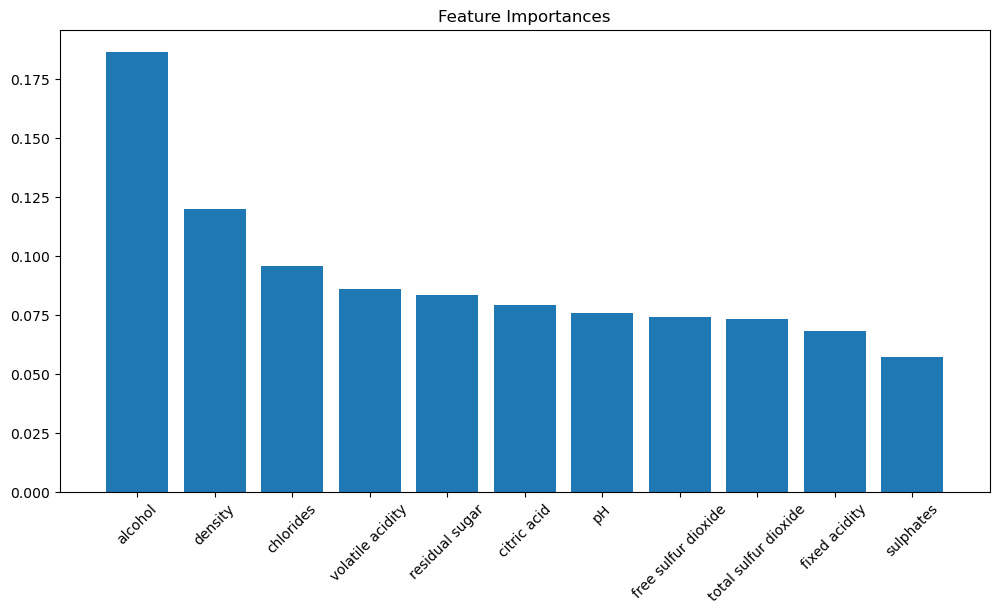

'\nccuracy: 0.9134115\n              precision    recall  f1-score   support\n\n         0.0       0.93      0.90      0.91       767\n         1.0       0.90      0.93      0.92       769\n\n    accuracy                           0.91      1536\n   macro avg       0.91      0.91      0.91      1536\nweighted avg       0.91      0.91      0.91      1536\n'

In [55]:
### SMOTE 이전 GridSearchCV의 파라미터로 실시한 결과
best_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

best_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

'''
ccuracy: 0.9134115
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       767
         1.0       0.90      0.93      0.92       769

    accuracy                           0.91      1536
   macro avg       0.91      0.91      0.91      1536
weighted avg       0.91      0.91      0.91      1536
'''

In [12]:
# from sklearn.model_selection import GridSearchCV

# # 하이퍼파라미터 그리드 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2', None]
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# print(grid_search.best_params_)

# '''{'max_depth': None,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 200}'''

Accuracy: 0.9160156
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       767
         1.0       0.90      0.93      0.92       769

    accuracy                           0.92      1536
   macro avg       0.92      0.92      0.92      1536
weighted avg       0.92      0.92      0.92      1536



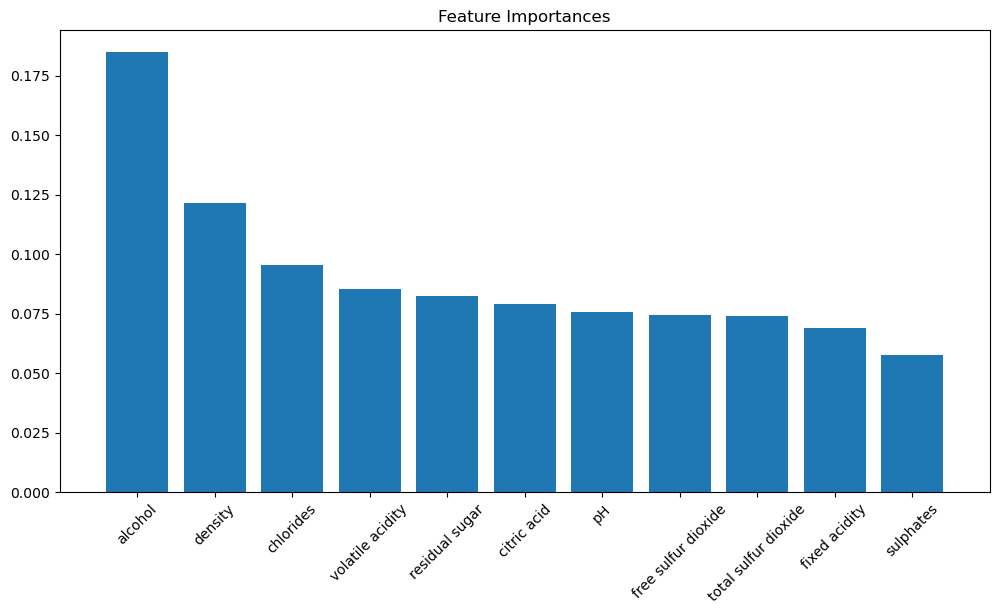

['random_forest_model_with_smote.pkl']

In [56]:
### SMOTE 이전 GridSearchCV의 파라미터로 실시한 결과
best_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

# 예측
y_pred = best_model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 특성 중요도 시각화
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()

import joblib

# 모델 저장
joblib.dump(best_model, 'random_forest_model_with_smote.pkl')


In [57]:
# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.7f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9121094
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       767
         1.0       0.90      0.93      0.91       769

    accuracy                           0.91      1536
   macro avg       0.91      0.91      0.91      1536
weighted avg       0.91      0.91      0.91      1536



c:\Users\kdp\anaconda3\envs\ML_PY39\lib\site-packages\xgboost\core.py:158: UserWarning: [09:27:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
import joblib

# 모델 저장
joblib.dump(best_model, 'random_forest_model_with_smote.pkl')

['random_forest_model_with_smote.pkl']